# Problem 1
Create a k-regular undirected graph (each node has fixed degree k). Draw the graph for k = 4 and
number of nodes n = 15 using draw() function and print the adjacency matrix.

In [1]:
import networkx as nx

# Create an Undirected Multi Graph Datatype
G1 = nx.MultiGraph()

In [2]:
# Add 15 nodes to the graph
G1.add_nodes_from(range(1, 15))

In [3]:
import random
import numpy

# Create a degree vector and Adjacency matrix 
degree = [0] * 15
adj_matrix = numpy.zeros((15, 15))

# Create a list for book keeping of nodes still to be connected (degree < 4)
remaining = list(range(0, 15))

In [4]:
# Function to add an edge in the graph
# Takes care of degree and adj matric as well

def add_edge(i, j):
    # Add edge
    G1.add_edge(i, j)
    
    # Degree and Adj matrix update
    degree[i] += 1
    adj_matrix[i][j] += 1
    
    degree[j] += 1
    adj_matrix[j][i] += 1
    
    # If degree crosses, node need not be connected anymore
    # Remove from "remaining" vector
    if degree[j] >= 4:
        if j in remaining:
            remaining.remove(j)
    if degree[i] >= 4:
        if i in remaining:
            remaining.remove(i)

In [5]:
# Add edges for all the 15 nodes
for i in range(15):
    
    # Remove current node from remaining 
    # As it willbe fully connected in this iteration
    if i in remaining:
        remaining.remove(i)
    
    # Sample 4 nodes to be connected
    try:
        connect = random.sample(remaining, 4 - degree[i])
    # If 4 not present, take whatever is left
    except:
        connect = remaining
    
    # Add Edges
    for j in connect:
        add_edge(i, j)

In [6]:
# If any more nodes remain. Use Self-loops or inter connections to satisfy degree

left = [x for x in range(15) if degree[x] != 4]
while(len(left) != 0):
    if(len(left) == 2):
        add_edge(left[0], left[1])
    elif(len(left) == 1):
        add_edge(left[0], left[0])
    left = [x for x in range(15) if degree[x] != 4]

In [7]:
# Edges List
G1.edges

MultiEdgeView([(1, 12, 0), (1, 3, 0), (1, 11, 0), (1, 14, 0), (2, 7, 0), (2, 5, 0), (2, 14, 0), (2, 6, 0), (3, 0, 0), (3, 14, 0), (3, 13, 0), (4, 13, 0), (4, 11, 0), (4, 10, 0), (4, 8, 0), (5, 6, 0), (5, 12, 0), (5, 13, 0), (6, 10, 0), (6, 7, 0), (7, 0, 0), (7, 11, 0), (8, 12, 0), (8, 10, 0), (8, 9, 0), (9, 11, 0), (9, 12, 0), (9, 10, 0), (13, 0, 0), (14, 0, 0)])

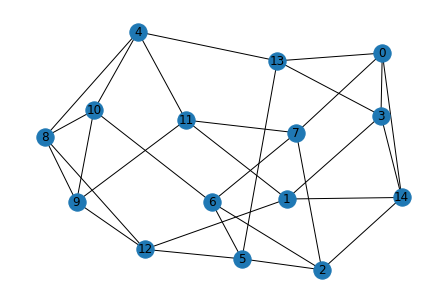

In [8]:
# Visualisation
nx.draw(G1, with_labels=True)

In [9]:
# Verification
print("List of all degrees: ", degree)
print("Is G1 regular: ", nx.algorithms.regular.is_k_regular(G1, k=4))

List of all degrees:  [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
Is G1 regular:  True


In [10]:
# Adjacency Matrix
adj_matrix

array([[0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0.

# Problem 2
Add node attributes like node ID and color. Show the graph attributes using the function G.nodes.data() function.

In [11]:
# Initialise another Undirected Graph Data type
G2 = nx.MultiGraph()

In [12]:
# Add Node attributes
G2.add_nodes_from([
    (0, {"nodeID": "Lioniel Messi", "color":"Black"}),   
    (1, {"nodeID": "Neymar", "color":"White"}),
    (2, {"nodeID": "Sergio Ramos", "color":"Gray"}),
    (3, {"nodeID": "Marquinhos", "color":"Silver"}),
    (4, {"nodeID": "Kimpembe", "color":"Maroon"}),
    (5, {"nodeID": "Kurzawa", "color":"Red"}),
    (6, {"nodeID": "Verratti", "color":"Purple"}),
    (7, {"nodeID": "Draxier", "color":"Green"}),
    (8, {"nodeID": "Mbappe", "color":"Lime"}),
    (9, {"nodeID": "Di Maria", "color":"Olive"}),
    (10, {"nodeID": "Draxier", "color":"Yellow"}),
    (11, {"nodeID": "Bernat", "color":"Navy"}),
    (12, {"nodeID": "Diallo", "color":"Blue"}),
    (13, {"nodeID": "Icardi", "color":"Teal"}),
    (14, {"nodeID": "Keylor Navas", "color":"Aqua"}),
])

In [13]:
# Use same nodes from G1
G2.add_edges_from(G1.edges)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

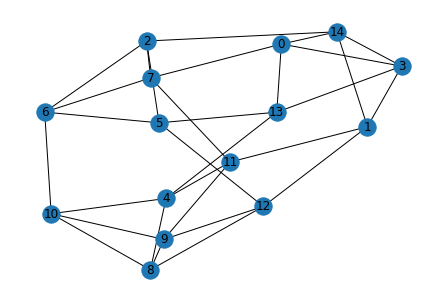

In [14]:
# Visualisation
nx.draw(G2, with_labels = True)

In [15]:
# Node data
G2.nodes.data()

NodeDataView({0: {'nodeID': 'Lioniel Messi', 'color': 'Black'}, 1: {'nodeID': 'Neymar', 'color': 'White'}, 2: {'nodeID': 'Sergio Ramos', 'color': 'Gray'}, 3: {'nodeID': 'Marquinhos', 'color': 'Silver'}, 4: {'nodeID': 'Kimpembe', 'color': 'Maroon'}, 5: {'nodeID': 'Kurzawa', 'color': 'Red'}, 6: {'nodeID': 'Verratti', 'color': 'Purple'}, 7: {'nodeID': 'Draxier', 'color': 'Green'}, 8: {'nodeID': 'Mbappe', 'color': 'Lime'}, 9: {'nodeID': 'Di Maria', 'color': 'Olive'}, 10: {'nodeID': 'Draxier', 'color': 'Yellow'}, 11: {'nodeID': 'Bernat', 'color': 'Navy'}, 12: {'nodeID': 'Diallo', 'color': 'Blue'}, 13: {'nodeID': 'Icardi', 'color': 'Teal'}, 14: {'nodeID': 'Keylor Navas', 'color': 'Aqua'}})

# Problem 3
Create a directed graph of n = 15 nodes and random directed edges, where the probability of an edge from node i to j is 0.6. Draw the graph using draw() function.

In [16]:
# Initialise a Directed Graph Datatype
G3 = nx.DiGraph()

# Add 15 nodes
G3.add_nodes_from(range(15))

In [17]:
import random

# Define a threshold
threshold = 0.6

# Add node if random number is less than threshold
for i in range(15):
    for j in range(15):
        if(random.random() <= threshold):
            G3.add_edge(i, j)

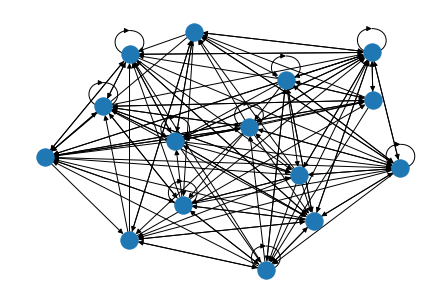

In [18]:
# Visualisation
nx.draw(G3)

# Problem 4
Create an undirected bipartite graph with 10 nodes in 1st layer and 5 in another. Create random edges
between nodes of 2 layers, where the probability of an edge appearing between node i and j is 0.5. Draw
the graph using draw() function.

In [19]:
from networkx.algorithms import bipartite

# Initialise a Graph Datatype
G4 = nx.Graph()

In [20]:
# Define Actor and Group nodes
actors = range(10)
groups = ['a', 'b', 'c', 'd', 'e']

# Add nodes to the each group respectively
G4.add_nodes_from(actors, bipartite = 0)
G4.add_nodes_from(groups, bipartite = 1)

In [21]:
# Define threshold
threshold = 0.5

# Add node if random number is less than threshold
for i in actors:
    for j in groups:
        if(random.random() <= threshold):
            G4.add_edge(i, j)

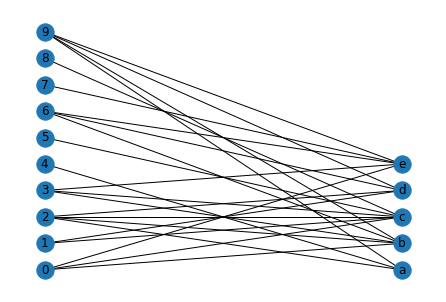

In [22]:
pos = {}

# Update position for node from each group
pos.update((node, (1, index)) for index, node in enumerate(actors))
pos.update((node, (2, index)) for index, node in enumerate(groups))

nx.draw(G4, pos=pos, with_labels = True)

In [23]:
# Verification
bipartite.is_bipartite(G4)

True

# Problem 5
Create an one-mode projection on layer 1 and draw the graph using draw() function

In [24]:
# Make a projected graph on actors
G5 = bipartite.projected_graph(G4, nodes = actors)

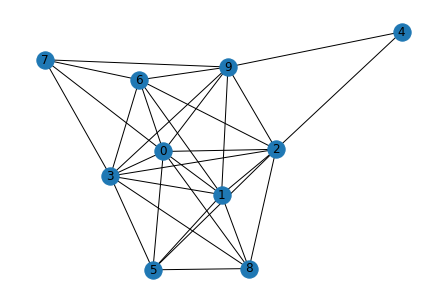

In [25]:
# Visualisation
nx.draw(G5, with_labels = True)